**Import necessary libraries**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,classification_report,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

**Read the Dataset**

In [21]:
data=pd.read_csv("/content/email.csv")

In [22]:
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,Email 4163,8,12,3,1,1,4,87,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4163,Email 4164,8,11,3,1,1,4,86,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4164,Email 4165,0,0,1,0,1,0,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4165,Email 4166,1,0,1,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Exploratory Data Analysis**

In [23]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,...,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000
mean,6.182865,5.794096,5.561075,2.816175,3.026158,2.432685,52.438925,2.356132,2.222222,9.880010,...,0.006241,0.006481,0.011522,0.091695,0.004321,0.007441,0.004801,0.918147,0.006481,0.285646
std,11.247901,9.163519,15.469204,5.773015,4.572931,6.003697,84.234040,4.326550,7.627713,18.564662,...,0.117841,0.114731,0.119470,0.555010,0.100326,0.152427,0.078863,2.942306,0.096549,0.451776
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,27.000000,1.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,7.000000,4.000000,3.000000,4.000000,2.000000,58.000000,3.000000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,44.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,5.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [24]:
data.sample()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
3724,Email 3725,7,2,1,1,3,0,25,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Columns: 3002 entries, Email No. to Prediction
dtypes: float64(2975), int64(26), object(1)
memory usage: 95.4+ MB


In [26]:
data.shape

(4167, 3002)

**Checking null values**

In [41]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

**Dropping null values**

In [40]:
data=data.dropna()

In [43]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [65]:
data=data.drop('Email No.',axis=1)

In [66]:
data['Prediction']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4161    0.0
4162    0.0
4163    0.0
4164    0.0
4165    1.0
Name: Prediction, Length: 4166, dtype: float64

**Distribution plot**

<ipython-input-67-d2d7755f7e8e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Prediction'])


<Axes: xlabel='Prediction', ylabel='Density'>

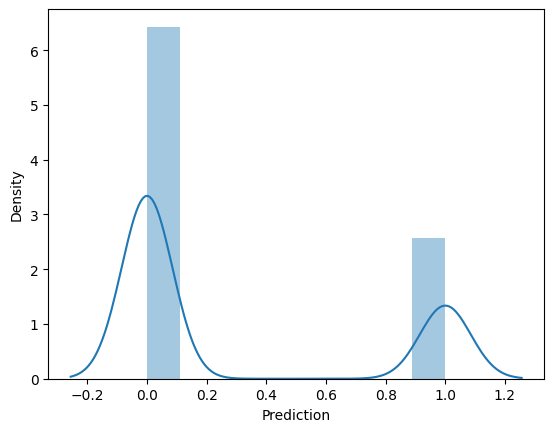

In [67]:
sns.distplot(data['Prediction'])

In [68]:
data.nunique()

the           81
to            67
ect           90
and           50
for           40
              ..
military       4
allowing       3
ff            22
dry            3
Prediction     2
Length: 3001, dtype: int64

**Data splitting**

In [69]:
x=data.drop('Prediction',axis=1)
y=data.Prediction

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [71]:
x_train.shape

(3332, 3000)

In [72]:
x_test.shape

(834, 3000)

**Classification Metrics**

In [73]:
def metrics(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")

    cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Ham'] )
    cm.plot()
    plt.show()

**Gaussian Naive Bayes**

Precision :  0.9253112033195021
Recall :  0.9695652173913043
Accuracy Score :  0.9700239808153477
F1 Score :  0.9469214437367304

 [[586  18]
 [  7 223]]



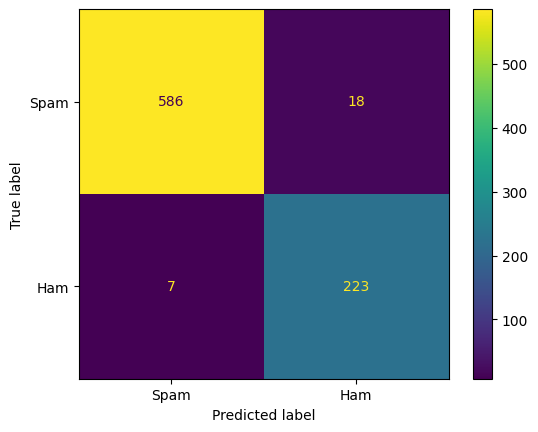

In [75]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
y_pred_nb = model_nb.predict(x_test)
metrics(y_pred_nb)